In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras._tf_keras.keras.applications.mobilenet import MobileNet, preprocess_input
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Dense, Flatten
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [2]:
base_model= MobileNet(input_shape=(224,224,3), include_top=False)
for layer in base_model.layers:
    layer.trainable=False
    
x=Flatten()(base_model.output)
x=Dense(units=7, activation='softmax')(x)

model= Model(base_model.input,x)

In [3]:
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,580,103 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [4]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

train_data=train_datagen.flow_from_directory(directory="./train", target_size=(224,224), batch_size=32)

train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [5]:
val_datagen=ImageDataGenerator(rescale=1/255)

val_data=val_datagen.flow_from_directory(directory="./train", target_size=(224,224), batch_size=32)

Found 350 images belonging to 7 classes.


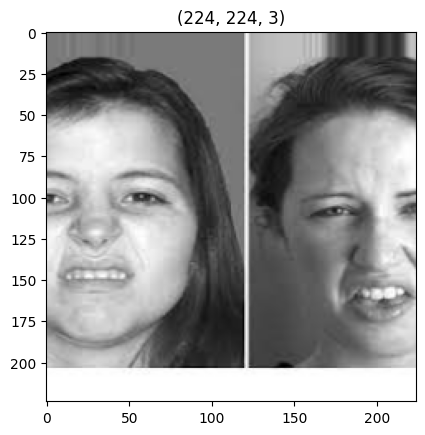

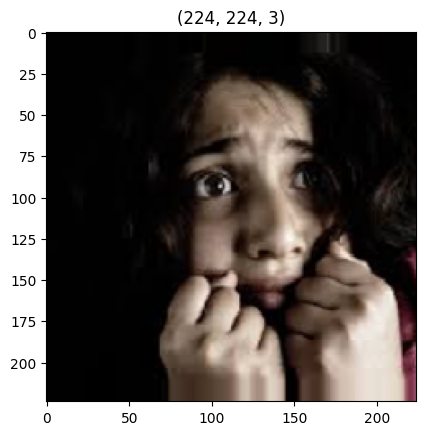

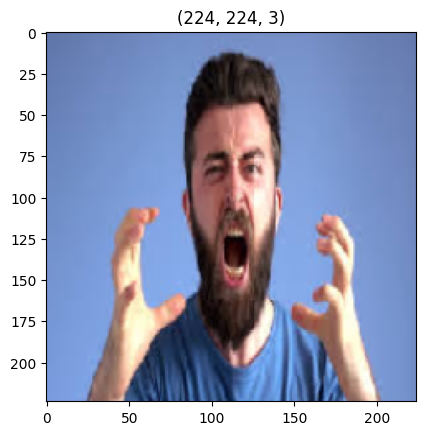

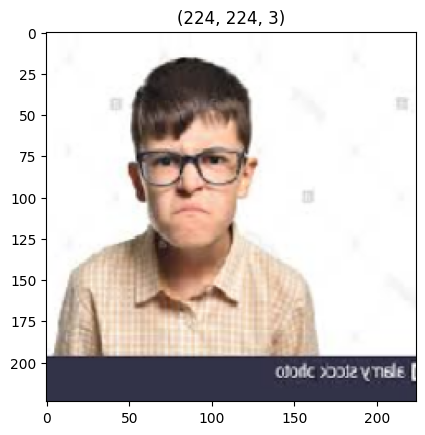

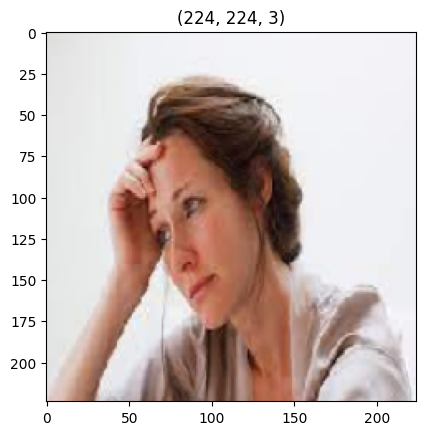

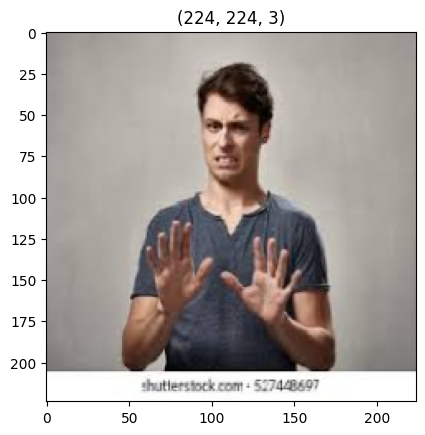

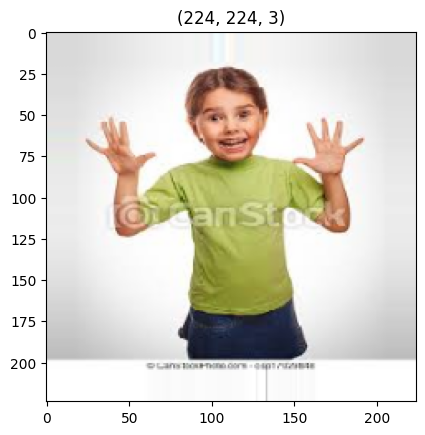

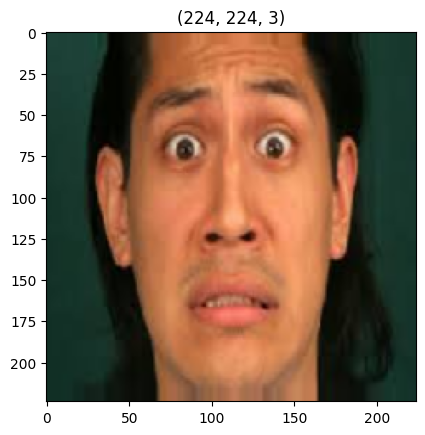

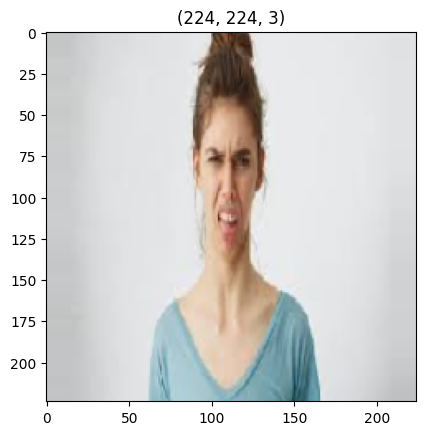

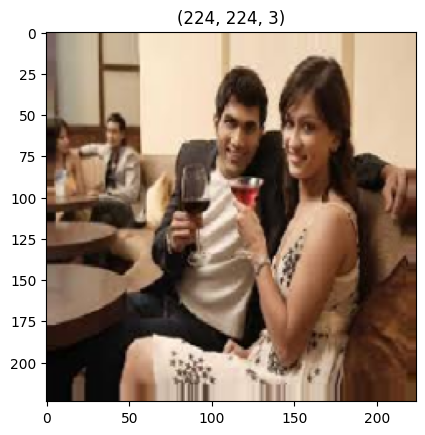

In [6]:
t_img, label=train_data.__next__()

def plotImages(img_arr,label):
    count=0
    for im, l in zip(img_arr,label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis=False
        plt.show()
        
        count+=1
        if count==10:
            break
        
plotImages(t_img,label)

In [7]:
from keras._tf_keras.keras.callbacks import ModelCheckpoint, EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=5, verbose=1, mode='auto')

mc=ModelCheckpoint(filepath='../model/best_model.keras', monitor='val_accuracy',verbose=1, save_best_only=True, mode='auto')

call_back=[es,mc]

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
hist=model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=0,
    callbacks=[es,mc]
)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.4973 - loss: 5.7126
Epoch 1: val_accuracy improved from 0.40286 to 0.69143, saving model to ../model/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5013 - loss: 5.6302 - val_accuracy: 0.6914 - val_loss: 2.2928
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 7s 792ms/step - accuracy: 0.6562 - loss: 2.9285

C:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.69143 to 0.70000, saving model to ../model/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6562 - loss: 2.9285 - val_accuracy: 0.7000 - val_loss: 2.1645
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7299 - loss: 2.0803
Epoch 3: val_accuracy improved from 0.70000 to 0.84286, saving model to ../model/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.7310 - loss: 2.0566 - val_accuracy: 0.8429 - val_loss: 0.7923
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 8s 980ms/step - accuracy: 0.8750 - loss: 0.4616
Epoch 4: val_accuracy did not improve from 0.84286
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8750 - loss: 0.4616 - val_accuracy: 0.8400 - val_loss: 0.7710
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8469 - loss: 1.0038
Epoch 5: val_accuracy improved from 0.84286 to 0.89429, saving model to ../model/best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8477

In [12]:
from keras._tf_keras.keras.models import load_model
model = load_model("../model/best_model.keras")

In [13]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

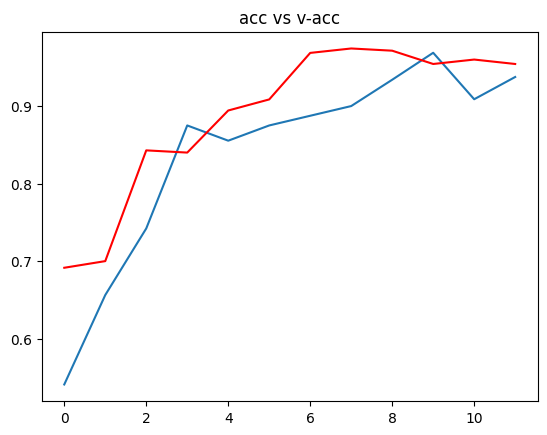

In [14]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

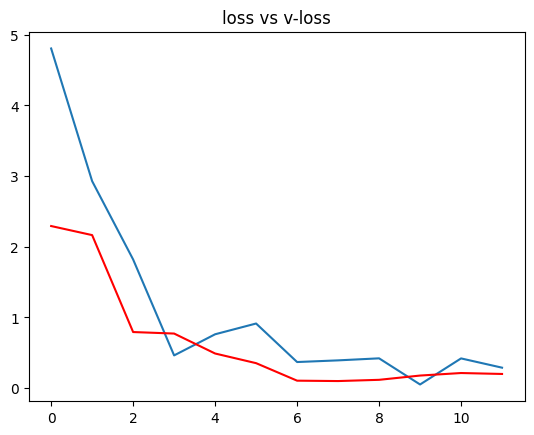

In [15]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [17]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))
print(op)

{0: 'Angry', 1: 'Disguist', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}
